In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

%matplotlib notebook
from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.animation import FuncAnimation

In [2]:
s = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', \
                    'file':10, 'itime':10, 'lon': -66.6, 'lat': 36., \
                    'plot_map': False, 'contour':False}}, zmax = 4900)

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00260.nc
Uses the following time : 10


---
---
# Initialisation of parameters

In [3]:
dire = '/home1/datawork/aponte/cognac/R0/'
Arr, Pos = s.read_arrivals_asc(dire+'OUT00/0_time0_10km.arr', Narrmx = 66)

Max.number of arrivals for source index 0 is 65


In [4]:
Nsd = np.shape(Pos['s']['depth'])[0]
Nrd = np.shape(Pos['r']['depth'])[0]
Nrr = np.shape(Pos['r']['range'])[0]
print('Number of source depths   : Nsd = ', Nsd)
print('Number of receiver depths : Nrd = ', Nrd)
print('Number of receiver ranges : Nrr = ', Nrr)

Number of source depths   : Nsd =  1
Number of receiver depths : Nrd =  51
Number of receiver ranges : Nrr =  101


In [5]:
### sonar equation
SL = 185                 # Souce level (dB)
NL = 81.7                # Noise level (dB)
DI = 0                   # Directivity index (dB)
B = 200                  # bandwidth (Hz)
T = 1                    # transmitted signal duration (s)
PG = 10.0*np.log10(B*T)  # Processing gain (dB)

#RT  = SL - TL - NL + DI + PG 
seuil_d = 10.

In [6]:
# Create time table from bellhop output data. Based on detection treshold method.
def time_table (Arr) :
    T = np.zeros( (Nrr, Nrd, Nsd) )
    for isd1 in range (Nsd):
        for ird1 in range (Nrd) : 
            for irr1 in range (Nrr) :
                Narr = int(Arr['Narr'][irr1, ird1, isd1])
                if not Narr ==0 :
                    A = abs(Arr['A'][irr1, :Narr, ird1, isd1])  # amplitude 
                    TL = - 20.0*np.log10(A)
                    RL = SL - TL - NL +DI + PG    # received level 
                    t = Arr['delay'][irr1, :Narr, ird1, isd1]
                    t_ok = t[np.where(RL > seuil_d)]

                    if len(t_ok > 0): 
                        t_min = np.min(t_ok)
                        T[irr1,ird1,isd1] = t_min  
                    else : 
                        T[irr1,ird1,isd1] = np.NaN
                else : 
                    T[irr1,ird1,isd1] = np.NaN
    return (T)

In [7]:
isd = 0    # source number (only 1 source here)
R = np.array(Pos['r']['range'])
Z = np.array(Pos['r']['depth'])

---
---
# Creation of matrix of results

In [8]:
### Tous les infos dans les noms de fichiers
nb_files = 65
nb_times = [0,11]
nb_dist = [np.NaN,50,10]

### Matrices contenant toutes les cartes d'erreurs (pour profils tous les 50 et 10 km)
MAT_50 = np.zeros((Z.size, R.size, nb_files*len(nb_times)))
MAT_10 = np.zeros((Z.size, R.size, nb_files*len(nb_times)))
L_name = []
time = []
n = -1

for i in range (nb_files):
    if len(str(i))==1 : 
        folder = 'OUT0'+str(i)
    else : 
        folder = 'OUT'+str(i)

    for j in range(len(nb_times)):
        n+=1
        print(n)
        time.append(20*i+nb_times[j])
        file0 = str(i)+'_time'+str(nb_times[j])
        L_name.append(file0+'.arr')
        print(L_name[n])
        Tables = np.zeros ((Z.size, R.size, len(nb_dist)))
        for k in range (len(nb_dist)) :
            if np.isnan(nb_dist[k]) : 
                file1=''
            else : 
                file1 = '_%skm'%str(nb_dist[k])
            path = folder+'/'+file0+file1+'.arr'
            ###
            Arr, Pos = s.read_arrivals_asc(dire+path, Narrmx = 479)
            T = time_table(Arr)
            Tables[:,:,k]=T[:,:,0].T
        
        diff_50 = Tables[:,:,1] - Tables[:,:,0]
        MAT_50[:,:,n] = diff_50
        diff_10 = Tables[:,:,2] - Tables[:,:,0]
        MAT_10[:,:,n] = diff_10

0
0_time0.arr
Max.number of arrivals for source index 0 is 478
Max.number of arrivals for source index 0 is 86
Max.number of arrivals for source index 0 is 65
1
0_time11.arr
Max.number of arrivals for source index 0 is 811
Max.number of arrivals for source index 0 is 36
Max.number of arrivals for source index 0 is 120
2
1_time0.arr
Max.number of arrivals for source index 0 is 725
Max.number of arrivals for source index 0 is 44
Max.number of arrivals for source index 0 is 94
3
1_time11.arr
Max.number of arrivals for source index 0 is 854
Max.number of arrivals for source index 0 is 68
Max.number of arrivals for source index 0 is 122
4
2_time0.arr
Max.number of arrivals for source index 0 is 709
Max.number of arrivals for source index 0 is 128
Max.number of arrivals for source index 0 is 129
5
2_time11.arr
Max.number of arrivals for source index 0 is 568
Max.number of arrivals for source index 0 is 62
Max.number of arrivals for source index 0 is 132
6
3_time0.arr
Max.number of arrivals f

51
25_time11.arr
Max.number of arrivals for source index 0 is 634
Max.number of arrivals for source index 0 is 71
Max.number of arrivals for source index 0 is 145
52
26_time0.arr
Max.number of arrivals for source index 0 is 259
Max.number of arrivals for source index 0 is 65
Max.number of arrivals for source index 0 is 126
53
26_time11.arr
Max.number of arrivals for source index 0 is 492
Max.number of arrivals for source index 0 is 62
Max.number of arrivals for source index 0 is 93
54
27_time0.arr
Max.number of arrivals for source index 0 is 520
Max.number of arrivals for source index 0 is 44
Max.number of arrivals for source index 0 is 62
55
27_time11.arr
Max.number of arrivals for source index 0 is 325
Max.number of arrivals for source index 0 is 84
Max.number of arrivals for source index 0 is 66
56
28_time0.arr
Max.number of arrivals for source index 0 is 680
Max.number of arrivals for source index 0 is 59
Max.number of arrivals for source index 0 is 55
57
28_time11.arr
Max.number o

Max.number of arrivals for source index 0 is 325
102
51_time0.arr
Max.number of arrivals for source index 0 is 853
Max.number of arrivals for source index 0 is 113
Max.number of arrivals for source index 0 is 170
103
51_time11.arr
Max.number of arrivals for source index 0 is 964
Max.number of arrivals for source index 0 is 62
Max.number of arrivals for source index 0 is 135
104
52_time0.arr
Max.number of arrivals for source index 0 is 563
Max.number of arrivals for source index 0 is 61
Max.number of arrivals for source index 0 is 105
105
52_time11.arr
Max.number of arrivals for source index 0 is 487
Max.number of arrivals for source index 0 is 61
Max.number of arrivals for source index 0 is 268
106
53_time0.arr
Max.number of arrivals for source index 0 is 729
Max.number of arrivals for source index 0 is 68
Max.number of arrivals for source index 0 is 359
107
53_time11.arr
Max.number of arrivals for source index 0 is 800
Max.number of arrivals for source index 0 is 93
Max.number of arri

---
---
# Animations 

- https://github.com/markjay4k/fourier-transform/blob/master/Animated%20Sinc%20and%20FT%20example.ipynb
- https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/

<IPython.core.display.Javascript object>


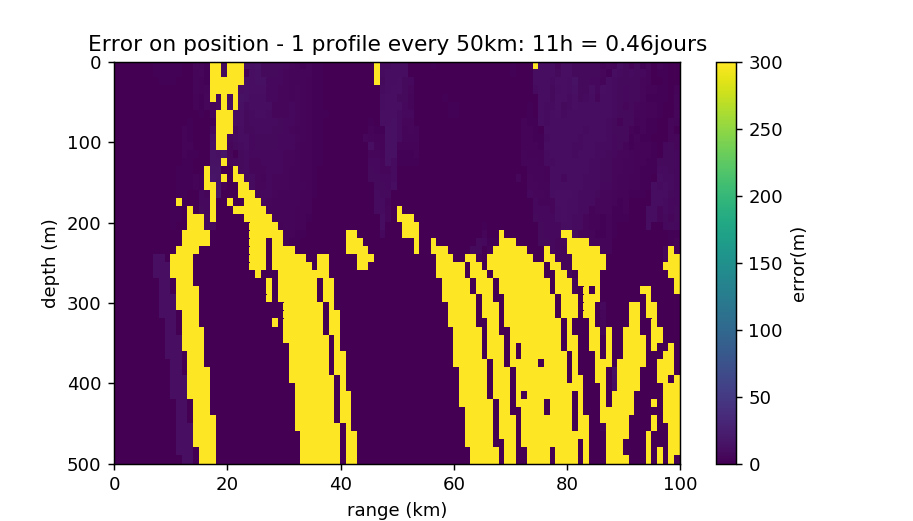

In [23]:
### Animation
fig, ax = plt.subplots(figsize=(7, 4))
ax.set(xlim=(0., 100.), ylim=(0., 500.))
   
cax = ax.pcolormesh(R/1000., Z, MAT_50[:, :, 0]*1500., vmin=0., vmax=300.)
cbar = fig.colorbar(cax)
plt.gca().invert_yaxis()
plt.xlabel('range (km)')
plt.ylabel('depth (m)')
cbar.set_label("error(m)")
    
def animate(i):
    cax.set_array((MAT_50[:-1,:-1,i]*1500.).flatten())
    plt.title('Error on position - 1 profile every 50km: %dh = %.2fjours' %(time[i],\
                                                                        time[i]/24.))

anim = FuncAnimation(fig, animate, interval=5.e2, frames=MAT_50.shape[2])
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


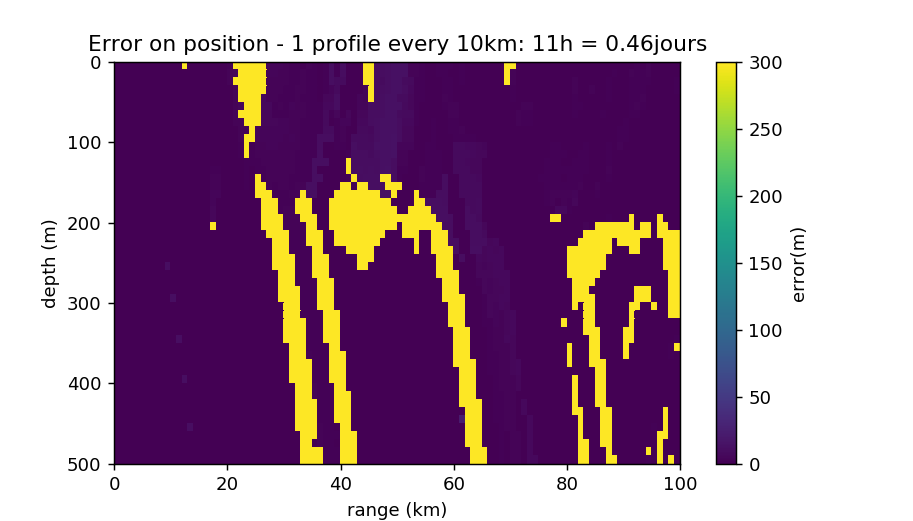

In [24]:
### Animation
fig, ax = plt.subplots(figsize=(7, 4))
ax.set(xlim=(0., 100.), ylim=(0., 500.))
   
cax = ax.pcolormesh(R/1000., Z, MAT_10[:, :, 0]*1500., vmin=0., vmax=300.)
cbar = fig.colorbar(cax)
plt.gca().invert_yaxis()
plt.xlabel('range (km)')
plt.ylabel('depth (m)')
cbar.set_label("error(m)")
    
def animate(i):
    cax.set_array((MAT_10[:-1,:-1,i]*1500.).flatten())
    plt.title('Error on position - 1 profile every 10km: %dh = %.2fjours' %(time[i],\
                                                                        time[i]/24.))

anim = FuncAnimation(fig, animate, interval=5.e2, frames=MAT_10.shape[2])
plt.draw()
plt.show()

In [22]:
# export the animation
#anim.save('error_profile_10km.gif', writer='imagemagick')

---
---
# Mean error 

<IPython.core.display.Javascript object>


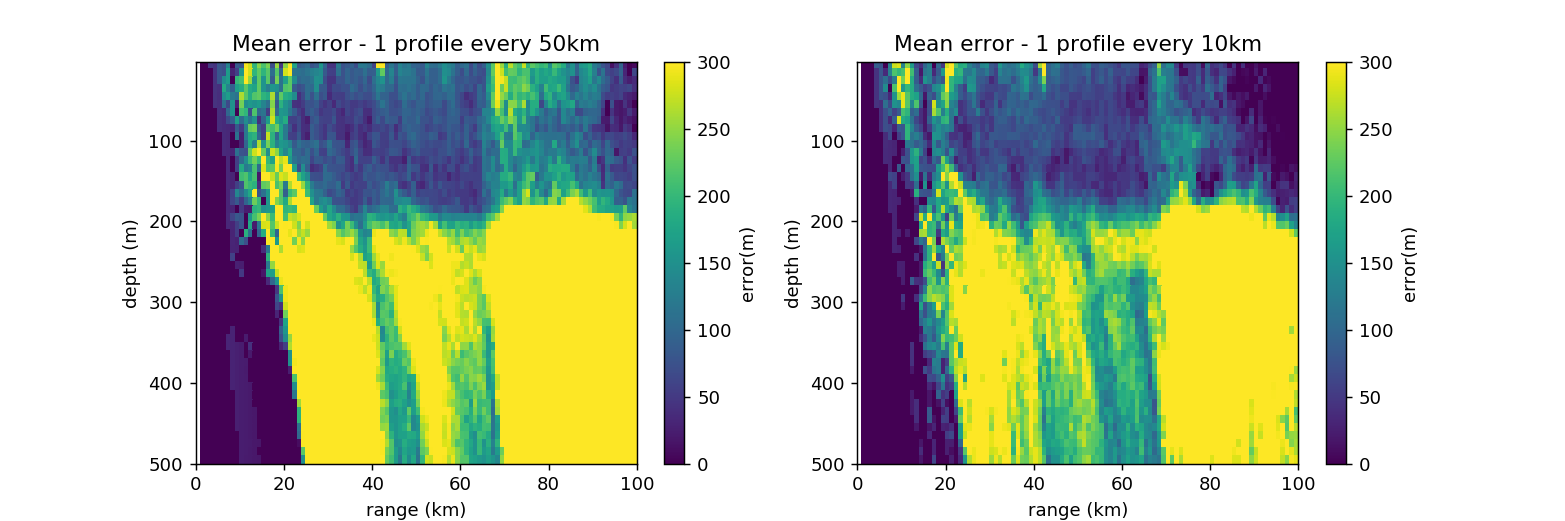

In [54]:
err_moy = np.zeros((Z.size, R.size))
for i in range (MAT_50.shape[2]):
    err_moy += (MAT_50[:,:,i]*1500.)
err_moy50 = err_moy/MAT_50.shape[2]

err_moy = np.zeros((Z.size, R.size))
for i in range (MAT_10.shape[2]):
    err_moy += (MAT_10[:,:,i]*1500.)
err_moy10 = err_moy/MAT_10.shape[2]

#plot
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.pcolormesh(R/1000., Z, err_moy50, vmin=0., vmax=300.)
cbar = plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('range (km)')
plt.ylabel('depth (m)')
plt.title('Mean error - 1 profile every 50km')
cbar.set_label("error(m)")

plt.subplot(122)
plt.pcolormesh(R/1000., Z, err_moy10, vmin=0., vmax=300.)
cbar = plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('range (km)')
plt.ylabel('depth (m)')
plt.title('Mean error - 1 profile every 10km')
cbar.set_label("error(m)")

In [53]:
# moyenne en chaque point (65valeurs), puis moyenne du résultats sur la grille
print('50 km : mean (erreur) = %.1fm' %np.mean(err_moy50[~np.isnan(err_moy50)]))
print('        max (erreur)  = %.1fm' %np.max(err_moy50[~np.isnan(err_moy50)]))

50 km : mean (erreur) = 285.0m
        max (erreur)  = 1248.7m


In [51]:
print('10 km : mean (erreur) = %.1fm' %np.mean(err_moy10[~np.isnan(err_moy10)]))
print('        max (erreur)  = %.1fm' %np.max(err_moy10[~np.isnan(err_moy10)]))

10 km : mean (erreur) = 203.8m
        max (erreur)  = 921.7m


In [55]:
err_moy50.shape

(51, 101)

In [60]:
### Sur les 20 premiers km 
err = err_moy50[:,:20]
print(np.mean(err[~np.isnan(err)]))
print(np.max(err[~np.isnan(err)]))

38.91250518030484
548.2549361538463


In [ ]:
### Faire la même chose avec la rms : valeur moyenne calculée ci-dessus
#rms = np.sqrt( np.mean( (x - r.x)**2 ) )

---
---
---


# Profils de célérité 2D

In [57]:
### Tous les infos dans les noms de fichiers
nb_files = 65
nb_times = [0,11]
nb_dist = [np.NaN,50,10]

### Define matrix size
path = dire +'OUT00/0_time0.ssp'
#'/home1/datawork/aponte/cognac/R0/OUT00/0_time0.ssp'
r_prof, d_prof, cmat = s.plotssp2D(path, plot=False)
zoom = 550
d_prof = d_prof[np.where(d_prof <= zoom)]
r_size = r_prof.size
d_size = d_prof.size

### Matrices contenant toutes les cartes d'erreurs (pour profils tous les 50 et 10 km)
MAT_prof = np.zeros((d_size, r_size, nb_files*len(nb_times)))
L_name = []
time = []
n = -1

for i in range (nb_files):
    if len(str(i))==1 : 
        folder = 'OUT0'+str(i)
    else : 
        folder = 'OUT'+str(i)
    for j in range(len(nb_times)):
        n+=1
        time.append(20*i+nb_times[j])
        file0 = str(i)+'_time'+str(nb_times[j])
        L_name.append(file0+'.ssp')
        #
        path = dire+folder+'/'+file0+'.ssp'
        r_prof, d_prof, cmat = s.plotssp2D(path, plot=False)
        d_prof = d_prof[np.where(d_prof <= zoom)]
        cmat = cmat[np.where(d_prof <= zoom)]
        #
        MAT_prof[:,:,n] = cmat

<IPython.core.display.Javascript object>


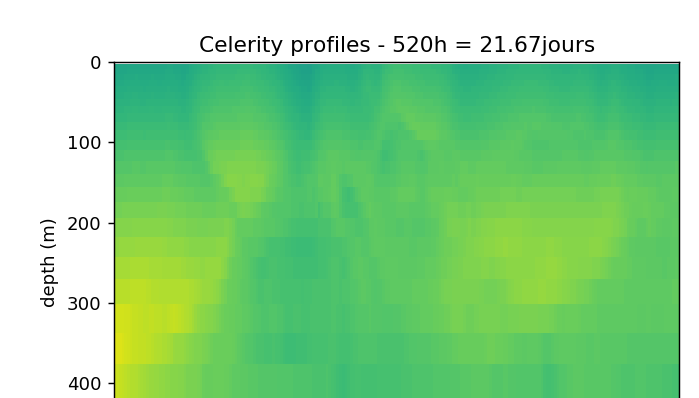

In [65]:
### Animation
fig, ax = plt.subplots(figsize=(7, 4))
ax.set(xlim=(0., 105.), ylim=(0., 500.))
   
cax = ax.pcolormesh(r_prof, d_prof, MAT_prof[:, :, 0], vmin=1515, vmax=1530)
cbar = fig.colorbar(cax)
plt.gca().invert_yaxis()
plt.xlabel('range (km)')
plt.ylabel('depth (m)')
cbar.set_label("celerity (m/s)")
    
def animate(i):
    cax.set_array((MAT_prof[:-1,:-1,i]).flatten())
    plt.title('Celerity profiles - %dh = %.2fjours' %(time[i], time[i]/24.))

anim = FuncAnimation(fig, animate, interval=5.e2, frames=MAT_prof.shape[2])
plt.draw()
plt.show()

In [66]:
# export the animation
#anim.save('celerity_profiles.gif', writer='imagemagick')